# Association Analysis in Python

This is a copy of the code presented in medium article called **Association Analysis in Python** [https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c]

In [60]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [61]:
## Use this to read data directly from github
df = pd.read_csv('https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv', sep=',')
## Use this to read data from the csv file on local system.
#df = pd.read_csv('./data/retail_data.csv', sep=',') 
## Print first 10 rows 
df.head(10)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
5,Eggs,Bread,Wine,Pencil,Milk,Diaper,Bagel
6,Wine,Pencil,Eggs,Cheese,NaN,NaN,NaN
7,Bagel,Bread,Milk,Pencil,Diaper,NaN,NaN
8,Bread,Diaper,Cheese,Milk,Wine,Eggs,NaN
9,Bagel,Wine,Diaper,Meat,Pencil,Eggs,Cheese


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       315 non-null    object
 1   1       285 non-null    object
 2   2       245 non-null    object
 3   3       187 non-null    object
 4   4       133 non-null    object
 5   5       71 non-null     object
 6   6       41 non-null     object
dtypes: object(7)
memory usage: 17.4+ KB


In [63]:
items = set()
for col in df:
    items.update(df[col].dropna().unique())
print(items)
print(f'Number of items: {len(items)}')

{'Bagel', 'Pencil', 'Cheese', 'Milk', 'Meat', 'Eggs', 'Diaper', 'Bread', 'Wine'}
Number of items: 9


## Data Preprocessing

In [64]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

ohe_df

,Bagel,Milk,Pencil,Cheese,Meat,Eggs,Diaper,Bread,Wine
0,0,0,1,1,1,1,1,1,1
1,0,1,1,1,1,0,1,1,1
2,0,1,0,1,1,1,0,0,1
3,0,1,0,1,1,1,0,0,1
4,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
310,0,0,0,1,0,1,0,1,0
311,0,1,1,0,1,0,0,0,0
312,0,0,1,1,1,1,1,1,1
313,0,0,0,1,1,0,0,0,0


## Applying Apriori

In [65]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 4 combinations | Sampling itemset size 4 3


c:\Users\madeinweb\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.361905,(Pencil)
3,0.501587,(Cheese)
4,0.476190,(Meat)
5,0.438095,(Eggs)
6,0.406349,(Diaper)


In [66]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650,0.402687
1,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
2,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
3,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891,0.526414
4,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540,0.500891


## Visualizing Results

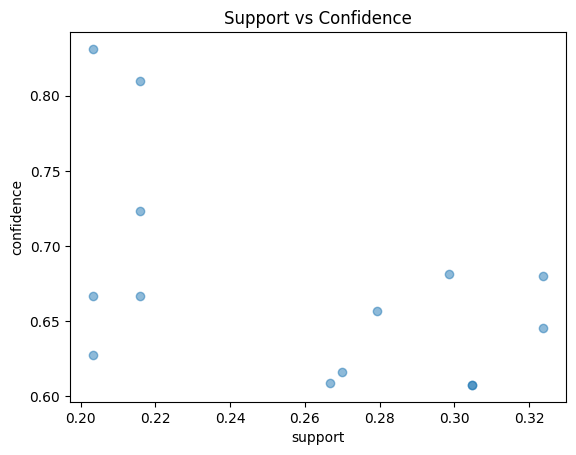

In [67]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

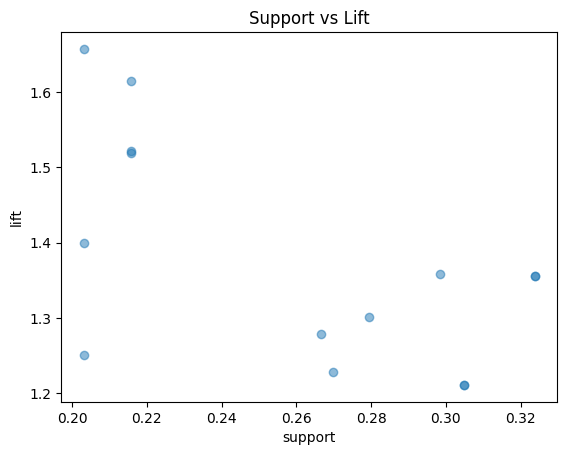

In [68]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

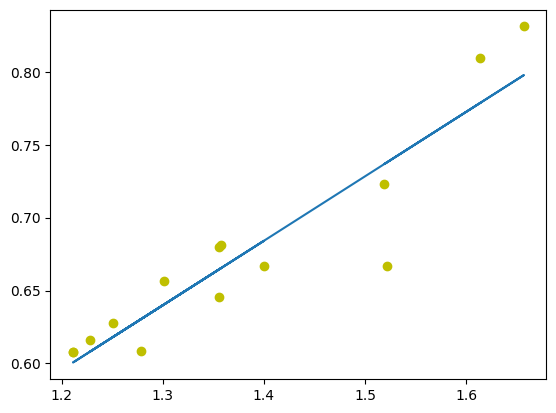

In [69]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))